# NYC 311 Service Requests

#### <ins>Background of Problem Statement :</ins>

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to **understand the pattern in the data** and also **visualize the major complaint types.**
Domain: Customer Service

#### Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

**Whether the average response time across complaint types is similar or not (overall)**

**Are the type of complaint or service requested and location related?**

# 1. Import a 311 NYC service request

In [1]:
# importing all the necessary libraries

import datetime 
import numpy as np
import pandas as pd
import scipy.stats as stats
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset

df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\gsspratn\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(300698, 53)

In [4]:
df.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
#checking the number of Nulls in each column
df.isnull().sum()/len(df)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [8]:
#checking the number of Nulls more than 30%
Nas_30 = df.loc[:,df.isnull().sum()/len(df)*100 >= 30]
print(len(Nas_30.columns),'columns with more than 30% Nulls to be removed.\n',Nas_30.keys())

14 columns with more than 30% Nulls to be removed.
 Index(['Intersection Street 1', 'Intersection Street 2', 'Landmark',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],
      dtype='object')


In [9]:
# Retaining columns with less than 30% Nulls
print('Updated DataFrame - ')
df = df.loc[:,df.isnull().sum()/len(df)*100 <= 30]
df.shape

Updated DataFrame - 


(300698, 39)

In [10]:
# Checking for columns more than 5% Null
Nas_5 = df.loc[:,df.isnull().sum()/len(df)*100 >5]

for i in range(len(Nas_5.columns)):
    df[Nas_5.columns[i]].fillna(value=df[Nas_5.columns[i]].mode()[0],inplace=True)
    print('Column:"{}" nulls replaced with mode()'.format(Nas_5.columns[i]))

Column:"Incident Address" nulls replaced with mode()
Column:"Street Name" nulls replaced with mode()
Column:"Cross Street 1" nulls replaced with mode()
Column:"Cross Street 2" nulls replaced with mode()


In [11]:
# Checking for columns with Nulls
Nas_0 = df.loc[:,df.isnull().sum()/len(df)*100 >0]
Nas_0.columns

Index(['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip',
       'Address Type', 'City', 'Facility Type', 'Due Date',
       'Resolution Action Updated Date', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School Region', 'School Code',
       'School Zip', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [12]:
#removing rows that have Nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290881 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      290881 non-null  int64  
 1   Created Date                    290881 non-null  object 
 2   Closed Date                     290881 non-null  object 
 3   Agency                          290881 non-null  object 
 4   Agency Name                     290881 non-null  object 
 5   Complaint Type                  290881 non-null  object 
 6   Descriptor                      290881 non-null  object 
 7   Location Type                   290881 non-null  object 
 8   Incident Zip                    290881 non-null  float64
 9   Incident Address                290881 non-null  object 
 10  Street Name                     290881 non-null  object 
 11  Cross Street 1                  290881 non-null  object 
 12  Cross Street 2  

In [13]:
df.shape

(290881, 39)

In [14]:
#checking columns with irrelevant data
Unique_df = pd.DataFrame()
for i in range(len(df.columns)):
    if len(df[df.columns[i]].unique())==1:
        Unique_df.insert(0,df.columns[i],df[df.columns[i]])

print(len(Unique_df.columns),'Columns with just 1 Unique value - \n')
for i in range(len(Unique_df.columns)):
    if len(df[Unique_df.columns[i]].unique())==1:
        print('{}. {}: {}'.format(i+1,Unique_df.columns[i],Unique_df[Unique_df.columns[i]].unique()))

15 Columns with just 1 Unique value - 

1. School Not Found: ['N']
2. School Zip: ['Unspecified']
3. School State: ['Unspecified']
4. School City: ['Unspecified']
5. School Address: ['Unspecified']
6. School Phone Number: ['Unspecified']
7. School Code: ['Unspecified']
8. School Region: ['Unspecified']
9. School Number: ['Unspecified']
10. School Name: ['Unspecified']
11. Park Facility Name: ['Unspecified']
12. Status: ['Closed']
13. Facility Type: ['Precinct']
14. Agency Name: ['New York City Police Department']
15. Agency: ['NYPD']


In [15]:
#dropping columns with irrelevant data
print('Dropping columns with just 1 Unique value - \n')
for i in range(len(Unique_df.columns)):
    print(Unique_df.columns[i])
    df.drop(labels=[Unique_df.columns[i]], axis=1, inplace=True)

Dropping columns with just 1 Unique value - 

School Not Found
School Zip
School State
School City
School Address
School Phone Number
School Code
School Region
School Number
School Name
Park Facility Name
Status
Facility Type
Agency Name
Agency


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290881 entries, 0 to 300697
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      290881 non-null  int64  
 1   Created Date                    290881 non-null  object 
 2   Closed Date                     290881 non-null  object 
 3   Complaint Type                  290881 non-null  object 
 4   Descriptor                      290881 non-null  object 
 5   Location Type                   290881 non-null  object 
 6   Incident Zip                    290881 non-null  float64
 7   Incident Address                290881 non-null  object 
 8   Street Name                     290881 non-null  object 
 9   Cross Street 1                  290881 non-null  object 
 10  Cross Street 2                  290881 non-null  object 
 11  Address Type                    290881 non-null  object 
 12  City            

In [17]:
df.shape

(290881, 24)

># <font color=green>2. Read or convert the columns <font color=blue>‘Created Date’</font> and <font color=blue>'Closed Date’</font> to datetime datatype and create a new column <font color=blue>‘Request_Closing_Time’</font> as the time elapsed between request creation and request closing. </font>
>#### (Hint: Explore the package/module datetime)

In [18]:
#converting string to datetime objects
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Due Date'] = pd.to_datetime(df['Due Date'])
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290881 entries, 0 to 300697
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      290881 non-null  int64         
 1   Created Date                    290881 non-null  datetime64[ns]
 2   Closed Date                     290881 non-null  datetime64[ns]
 3   Complaint Type                  290881 non-null  object        
 4   Descriptor                      290881 non-null  object        
 5   Location Type                   290881 non-null  object        
 6   Incident Zip                    290881 non-null  float64       
 7   Incident Address                290881 non-null  object        
 8   Street Name                     290881 non-null  object        
 9   Cross Street 1                  290881 non-null  object        
 10  Cross Street 2                  290881 non-null  object 

In [20]:
df['Request_Closing_Time']=(df['Closed Date']-df['Created Date']).dt.seconds/60

In [21]:
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,2016-01-01 07:43:00,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,2016-01-01 03:24:00,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


In [22]:
df['Request_Closing_Time'].mean()

235.52529184328264

># <font color=green>3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.</font>

#### 1) How quickly the cases were closed

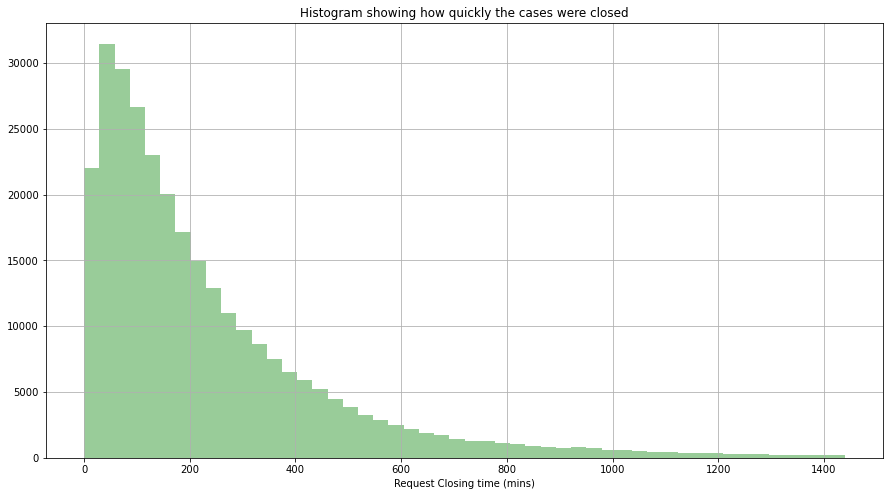

In [23]:
# Distribution of time taken to close the cases
plt.figure(figsize=(15,8))
sns.distplot(df['Request_Closing_Time'],kde=False,color='g')
plt.title('Histogram showing how quickly the cases were closed')
plt.xlabel('Request Closing time (mins)')
plt.grid()
plt.show()

<font color=blue>***Conclusion - Most of the cases were closed within 200 mins***

#### 2) Spread of request closing time

<Figure size 1440x720 with 0 Axes>

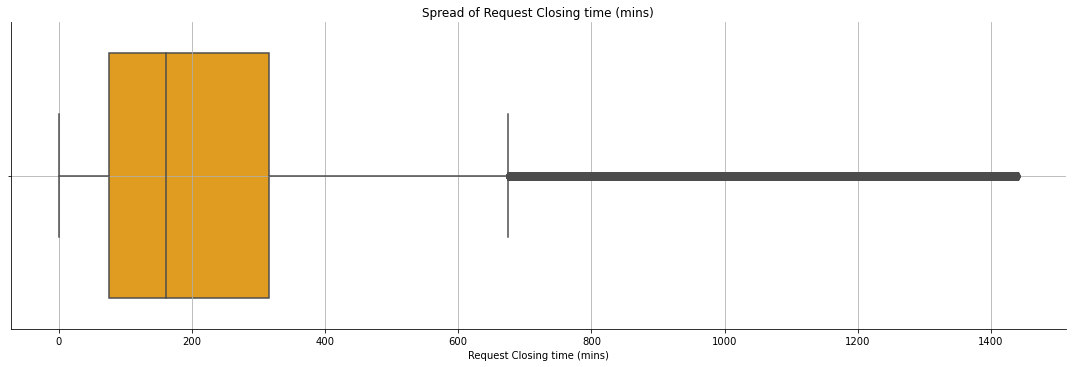

In [24]:
# box plot to find how the request closing time is spread
plt.figure(figsize=(20,10))
sns.catplot(x='Request_Closing_Time',data=df,kind='box',aspect=3, color='orange')
plt.xlabel('Request Closing time (mins)')
plt.title('Spread of Request Closing time (mins)')
plt.grid()
plt.show()

<font color=blue>***Conclusion - The box plot proves that the range of closing cases is from 75 to 325 with a mean around 175 mins***

#### 3) Different types of complaints

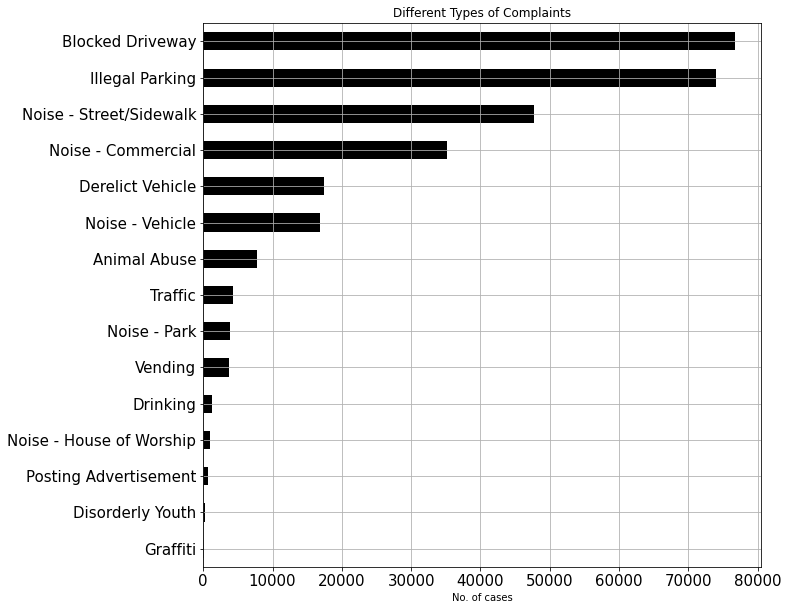

In [25]:
#To see how many types of complaints are registered
complaints = df['Complaint Type'].value_counts().sort_values()
plt.figure(figsize=(10,10))
complaints.plot(kind='barh',grid=True,color='black',fontsize=15)
plt.title('Different Types of Complaints')
plt.xlabel('No. of cases')
plt.show()

<font color=blue>***Conclusion - Most of the cases are from Blocked Driveway, Illegal Parking and Noise***

#### 4) Top 5 Locations types

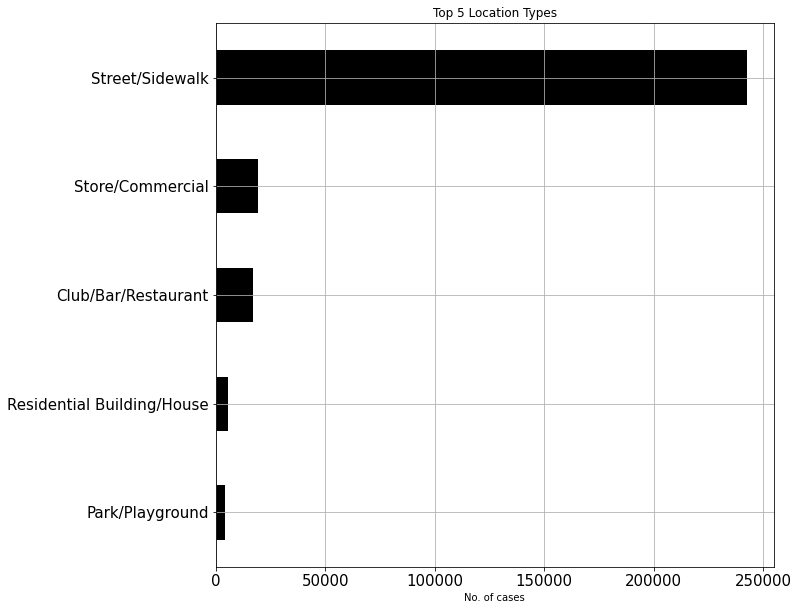

In [26]:
#Focus on the top locations where the complaints are registered
location = df['Location Type'].value_counts().sort_values(ascending = False).head().sort_values()
plt.figure(figsize=(10,10))
location.plot(kind='barh',grid=True,color='black',fontsize=15)
plt.title('Top 5 Location Types')
plt.xlabel('No. of cases')
plt.show()

<font color=blue>***Conclusion - Most of the complaints are from Street/Sidewalk***


In [27]:
#Top 5 cities with complaints
top_cities = df['City'].value_counts().head()
top_cities

BROOKLYN         96814
NEW YORK         61867
BRONX            40182
STATEN ISLAND    12186
JAMAICA           7144
Name: City, dtype: int64

In [28]:
top_comp_cities = df.groupby('City')
top_comp_cities = top_comp_cities.size().sort_values(ascending = False)
top_comp_cities = top_comp_cities.to_frame('count').reset_index()
top_comp_cities.head()

,City,count
0,BROOKLYN,96814
1,NEW YORK,61867
2,BRONX,40182
3,STATEN ISLAND,12186
4,JAMAICA,7144


#### 5) Top 5 NY Cities with Complaints

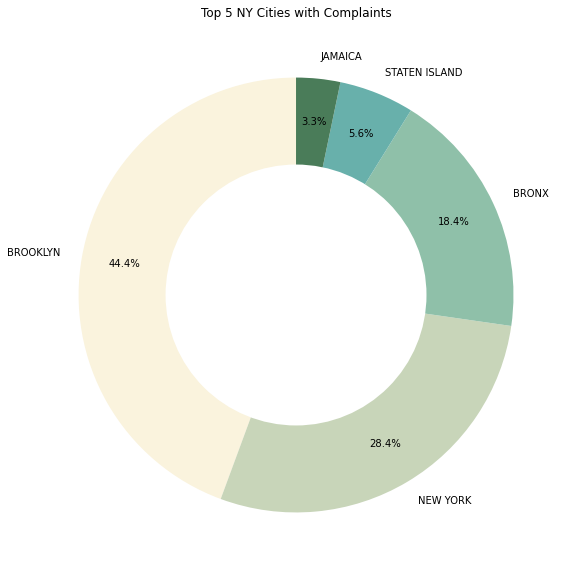

In [29]:
colors = ['#faf3dd', '#c8d5b9', '#8fc0a9', '#68b0ab', '#4a7c59']
top_comp_cities = top_comp_cities.head()
plt.figure(figsize=(10,10))
plt.pie(top_comp_cities['count'],
        labels=top_comp_cities['City'],
        autopct="%1.1f%%",
        startangle = 90,
        colors=colors,
       pctdistance=0.80)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 5 NY Cities with Complaints')
plt.show()

<font color=blue>***Conclusion - Brooklyn and New York are the top 2 cities from which the most complaints come from.***

In [30]:
# Top 6 Complaints received
top_complaints = df['Complaint Type'].value_counts().head(6)
print(top_complaints)
top_complaints_name = top_complaints.index.values
top_complaints_name

Blocked Driveway           76675
Illegal Parking            74020
Noise - Street/Sidewalk    47745
Noise - Commercial         35144
Derelict Vehicle           17496
Noise - Vehicle            16867
Name: Complaint Type, dtype: int64


array(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype=object)

In [31]:
df['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [32]:
borough_complaints = df.groupby(['Borough','Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_complaints_name]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12740,7829,8864,2431,1947,3385
BROOKLYN,28119,27386,13315,11451,5161,5145
MANHATTAN,2055,11980,20360,14528,528,5374
QUEENS,31620,21944,4391,6057,8098,2607
STATEN ISLAND,2141,4881,815,677,1762,356


#### 6) Top 6 Complaints stacked in each of the Boroughs

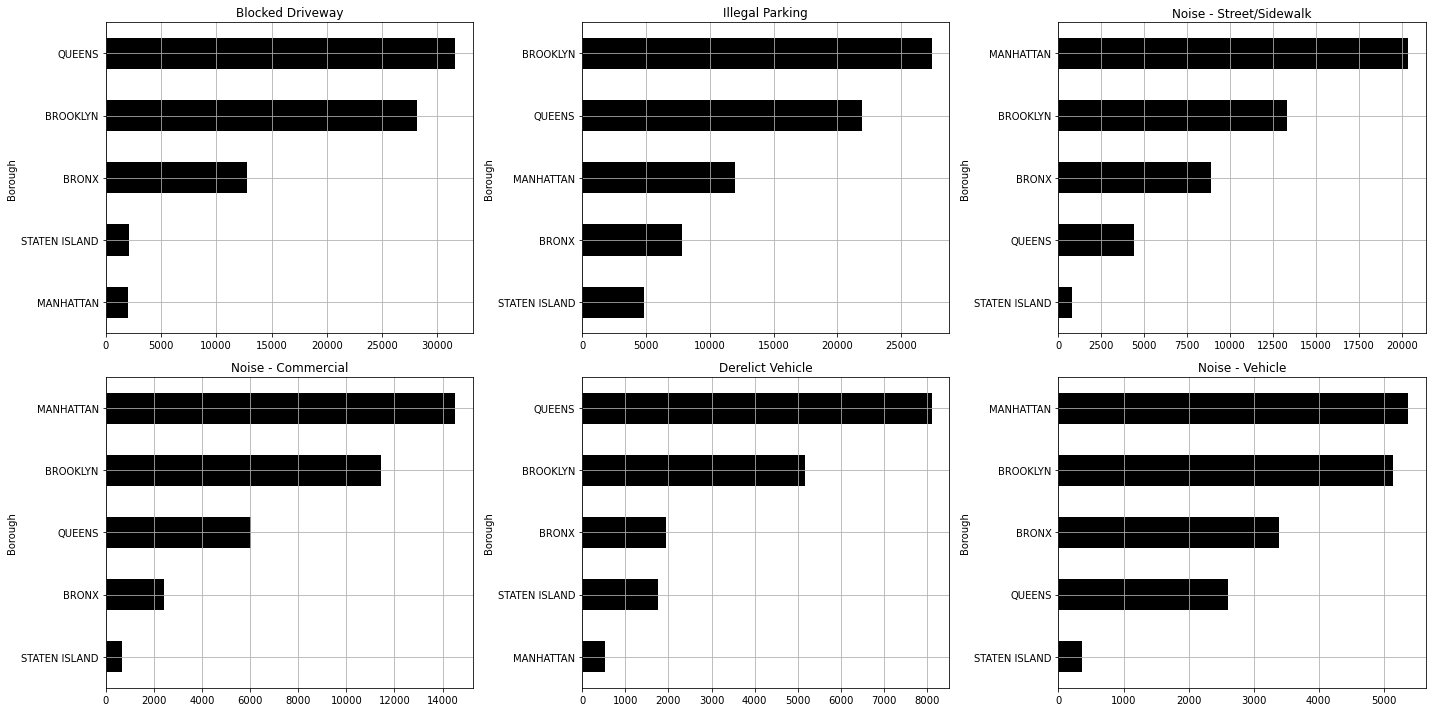

In [33]:
cols = 3
rows = 2
fig, ax = plt.subplots(rows, cols, figsize=(20,10))

for i, (title, col) in enumerate(borough_complaints.iteritems()):
    axis = ax[int(i/cols), i%cols]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=axis, grid=True, color='black')
    axis.set_title(title)

plt.tight_layout()

<font color=blue>***Conclusion - Manhattan receives more complaints on Noise***

># <font color=green>4. Order the complaint types based on the average <font color=blue>‘Request_Closing_Time’</font>, grouping them for different locations.</font>

In [34]:
df[['City','Complaint Type','Request_Closing_Time']]

,City,Complaint Type,Request_Closing_Time
0,NEW YORK,Noise - Street/Sidewalk,55.250000
1,ASTORIA,Blocked Driveway,86.266667
2,BRONX,Blocked Driveway,291.516667
3,BRONX,Illegal Parking,465.233333
4,ELMHURST,Illegal Parking,207.033333
...,...,...,...
300692,NEW YORK,Noise - Commercial,38.483333
300694,RICHMOND HILL,Blocked Driveway,120.516667
300695,BROOKLYN,Noise - Commercial,187.283333
300696,BRONX,Noise - Commercial,245.550000


In [35]:
# Group them by City (location) and then by Complaint Type
df_grouped = df.groupby(['City', 'Complaint Type'])

In [36]:
# Avg Response time for each Complaint Type for every City
# pd.options.display.max_rows = 999 #to show all rows in the result

df_grouped = df.groupby(['City','Complaint Type']).agg({'Request_Closing_Time': 'mean'})
df_grouped.sort_values(['City', 'Request_Closing_Time'], ascending=False)

Request_Closing_Time
City     Complaint Type                                
Woodside Blocked Driveway                    384.372727
         Illegal Parking                     298.752167
         Derelict Vehicle                    298.000000
         Noise - Street/Sidewalk             204.676667
         Noise - Commercial                  143.650000
...                                                 ...
ARVERNE  Noise - House of Worship             93.731818
         Graffiti                             92.000000
         Noise - Park                         77.000000
         Vending                              29.000000
         Drinking                             14.316667

[618 rows x 1 columns]

># <font color=green>5. Perform a statistical test for the following:</font>
>### <font color=blue>1.Whether the average response time across complaint types is similar or not (overall)</font>
>### <font color=blue>2.Are the type of complaint or service requested and location related?</font>
>
><ins>Note</ins>: For the above statements you need to state the Null (H0) and Alternate(HA) and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

***Statistical Test 1: Whether the average response time across complaint types is similar or not (overall)***  
H0 : Avg. Response Time for all complaint types is similar  
HA : Not similar  

We will decide the hypothesis based on [ANOVA test](http://pytolearn.csd.auth.gr/d1-hyptest/12/anova-one.html)  
ANOVA means 'one way' ANOVA = test for exploring the impact of one single factor on **three or more groups**

In [37]:
top_complaints = df['Complaint Type'].value_counts()
top_complaints

Blocked Driveway            76675
Illegal Parking             74020
Noise - Street/Sidewalk     47745
Noise - Commercial          35144
Derelict Vehicle            17496
Noise - Vehicle             16867
Animal Abuse                 7743
Traffic                      4256
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

In [38]:
top_compl_types = top_complaints.head(6).index
top_compl_types

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [39]:
data1 = df.loc[df['Complaint Type'].isin(top_compl_types), ['Complaint Type', 'Request_Closing_Time']]
data1.head()

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,55.250000
1,Blocked Driveway,86.266667
2,Blocked Driveway,291.516667
3,Illegal Parking,465.233333
4,Illegal Parking,207.033333


In [40]:
df_stats = data1.pivot(columns='Complaint Type', values='Request_Closing_Time')
df_stats1 = df_stats.rename(columns={'Blocked Driveway': 'Blocked_Driveway',
                                    'Derelict Vehicle' : 'Derelict_Vehicle',
                                    'Illegal Parking' : 'Illegal_Parking',
                                    'Noise - Commercial' : 'Noise_Commercial',
                                    'Noise - Street/Sidewalk' : 'Noise_Street_Sidewalk',
                                    'Noise - Vehicle' : 'Noise_Vehicle'})
df_stats1.keys()

Index(['Blocked_Driveway', 'Derelict_Vehicle', 'Illegal_Parking',
       'Noise_Commercial', 'Noise_Street_Sidewalk', 'Noise_Vehicle'],
      dtype='object', name='Complaint Type')

In [41]:
dC = df_stats1.Blocked_Driveway.dropna()
dT1 = df_stats1.Derelict_Vehicle.dropna()
dT2 = df_stats1.Illegal_Parking.dropna()
dT3 = df_stats1.Noise_Commercial.dropna()
dT4 = df_stats1.Noise_Street_Sidewalk.dropna()
dT5 = df_stats1.Noise_Vehicle.dropna()

In [42]:
print('Control group\n')
print(dC.describe())
print('\nTreatment-1 group\n')
print(dT1.describe())
print('\nTreatment-2 group\n')
print(dT2.describe())
print('\nTreatment-3 group\n')
print(dT3.describe())
print('\nTreatment-4 group\n')
print(dT4.describe())
print('\nTreatment-5 group\n')
print(dT5.describe())

Control group

count    76675.000000
mean       262.943983
std        239.058885
min          0.000000
25%         95.400000
50%        187.933333
75%        351.700000
max       1439.883333
Name: Blocked_Driveway, dtype: float64

Treatment-1 group

count    17496.000000
mean       334.975744
std        311.677048
min          0.000000
25%         99.000000
50%        234.850000
75%        468.570833
max       1439.800000
Name: Derelict_Vehicle, dtype: float64

Treatment-2 group

count    74020.000000
mean       247.940116
std        235.091096
min          0.000000
25%         82.566667
50%        173.841667
75%        336.175000
max       1439.000000
Name: Illegal_Parking, dtype: float64

Treatment-3 group

count    35144.000000
mean       178.933478
std        182.497288
min          1.000000
25%         56.550000
50%        124.000000
75%        239.441667
max       1435.266667
Name: Noise_Commercial, dtype: float64

Treatment-4 group

count    47745.000000
mean       193.074702
st

In [43]:
# Shapiro-Wilk normality test 
stats.shapiro(dC), stats.shapiro(dT1), stats.shapiro(dT2), stats.shapiro(dT3), stats.shapiro(dT4), stats.shapiro(dT5)

C:\Users\gsspratn\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.8206154108047485, pvalue=0.0),
 ShapiroResult(statistic=0.8556053042411804, pvalue=0.0),
 ShapiroResult(statistic=0.8203945755958557, pvalue=0.0),
 ShapiroResult(statistic=0.770423173904419, pvalue=0.0),
 ShapiroResult(statistic=0.7731069326400757, pvalue=0.0),
 ShapiroResult(statistic=0.7869990468025208, pvalue=0.0))

In [44]:
# Levene variance test  
stats.levene(dC, dT1, dT2, dT3, dT4, dT5)

LeveneResult(statistic=1164.0041829823745, pvalue=0.0)

In [45]:
F, p = stats.f_oneway(dC, dT1, dT2, dT3, dT4, dT5)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

F statistic = 1764.016 and probability p = 0.000


# <font color=red>Since the p-value is less than 0.05 so we reject H0 - Null hypothesis. Therefore we conclude that the average response time is not same.

***Statistical Test 2: Are the type of complaint or service requested and location related?***  
H0 : Complaint Type and Location is dependent / related  
HA : Complaint Type and Location is independent / not related  

In [46]:
top_cities = df['City'].value_counts().head()
top_cities

BROOKLYN         96814
NEW YORK         61867
BRONX            40182
STATEN ISLAND    12186
JAMAICA           7144
Name: City, dtype: int64

In [47]:
top_cities_names = top_cities.index
top_cities_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [48]:
data2 = df.loc[(df['Complaint Type'].isin(top_compl_types)) & (df['City'].isin(top_cities_names)), ['Complaint Type', 'City']]
data2.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [49]:
pd.crosstab(data2['Complaint Type'], data2['City'], margins=True)

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12740,28119,2814,2055,2141,47869
Derelict Vehicle,1947,5161,953,528,1762,10351
Illegal Parking,7829,27386,1419,11978,4881,53493
Noise - Commercial,2431,11451,427,14528,677,29514
Noise - Street/Sidewalk,8865,13316,328,20264,815,43588
Noise - Vehicle,3385,5145,301,5374,356,14561
All,37197,90578,6242,54727,10632,199376


In [50]:
ch2, p_value, dof, exp_frq = stats.chi2_contingency(pd.crosstab(data2['Complaint Type'], data2['City']))
print(ch2)
print(p_value)

41540.96029950684
0.0


# <font color=red>Since the p-value is less than 0.05 so we reject H0 - Null hypothesis. Therefore we conclude that complaint type and location are not related.